Data: https://www.kaggle.com/nasa/meteorite-landings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import plotly.express as px

Code to filter the meteorite data. Only needs to be run once.

In [2]:
meteorites = pd.read_csv("./data/meteorite-landings.csv", delimiter=",")
filtered_coords = (meteorites["reclong"] >= -180) & (meteorites["reclong"] <= 180) & ((meteorites["reclong"] != 0) | (meteorites["reclat"] != 0))
filtered_years = (meteorites["year"] >= 860) & (meteorites["year"] <= 2016)
filtered_meteorites = meteorites[filtered_coords & filtered_years]
filtered_meteorites.to_csv("./data/cleansed-data.csv")

Code to plot the data

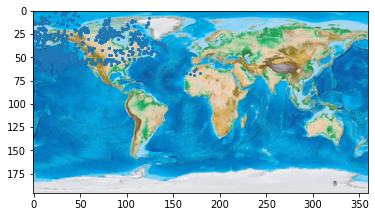

In [3]:
cleansed_meteorites = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
img = Image.open("images/map.jpg")
img.thumbnail((360, 200), Image.ANTIALIAS)
ax = plt.subplot()
ax.scatter(cleansed_meteorites["reclong"], cleansed_meteorites["reclat"], s=4)
# plt.figure(figsize=(20,15))
ax.imshow(img)
plt.show()
# plt.savefig("./images/testplot.png", format="png")

In [23]:
fig = px.scatter_geo(filtered_meteorites,lat='reclat',lon='reclong',hover_name="name",color="mass")
fig.update_layout(title = 'Meteorite Landings Across the World', title_x=.5)
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above